In [1]:
#Data set of Apple 10 years Weekly
#MODEL tried 
#1 Linear regression
#2 ridge regression
#3 Lasso regression
#4 decision trees
#5 Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/manish/Downloads/AAPL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-06,12.077500,12.079286,11.625357,11.639286,10.008657,1572552800
1,2011-06-13,11.685714,11.901786,11.368929,11.437857,9.835445,2188849600
2,2011-06-20,11.334286,11.898214,11.089286,11.655357,10.022475,2524177600
3,2011-06-27,11.699643,12.267857,11.687500,12.259286,10.541796,1744926400
4,2011-07-04,12.250000,12.857143,12.232143,12.846786,11.046986,1688976800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB


In [6]:
# extracting year and Month from Date object

In [7]:
date=pd.to_datetime(df['Date'])

In [8]:
date

0     2011-06-06
1     2011-06-13
2     2011-06-20
3     2011-06-27
4     2011-07-04
         ...    
518   2021-05-10
519   2021-05-17
520   2021-05-24
521   2021-05-31
522   2021-06-07
Name: Date, Length: 523, dtype: datetime64[ns]

In [9]:
df['Year']=date.dt.year

In [10]:
df['Month']=date.dt.month

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2011-06-06,12.077500,12.079286,11.625357,11.639286,10.008657,1572552800,2011,6
1,2011-06-13,11.685714,11.901786,11.368929,11.437857,9.835445,2188849600,2011,6
2,2011-06-20,11.334286,11.898214,11.089286,11.655357,10.022475,2524177600,2011,6
3,2011-06-27,11.699643,12.267857,11.687500,12.259286,10.541796,1744926400,2011,6
4,2011-07-04,12.250000,12.857143,12.232143,12.846786,11.046986,1688976800,2011,7
...,...,...,...,...,...,...,...,...,...
518,2021-05-10,129.410004,129.539993,122.250000,127.449997,127.449997,514054100,2021,5
519,2021-05-17,126.820000,128.000000,122.860001,125.430000,125.430000,386352000,2021,5
520,2021-05-24,126.010002,128.320007,124.550003,124.610001,124.610001,357615000,2021,5
521,2021-05-31,125.080002,126.160004,123.129997,125.889999,125.889999,278232500,2021,5


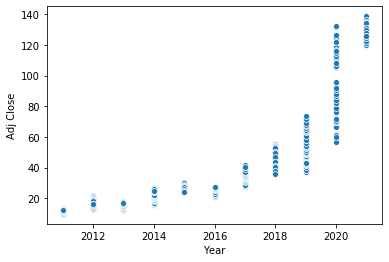

In [12]:
sns.scatterplot(x='Year',y='Adj Close',data=df)

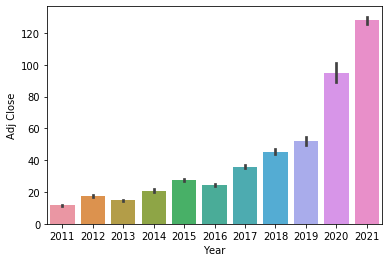

In [13]:
sns.barplot(x='Year',y='Adj Close',data=df)
# As the year increses the close price is also increasing with few ups and downs

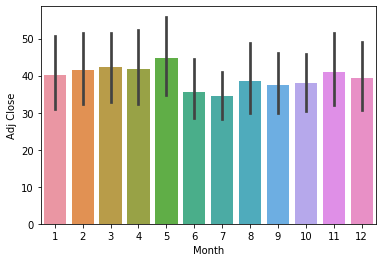

In [14]:
sns.barplot(x='Month',y='Adj Close',data=df)
# starting 5 month have more closing price than rest 
#this matches with AMAzon also 
#i don't know any specific reason for that why this occuring

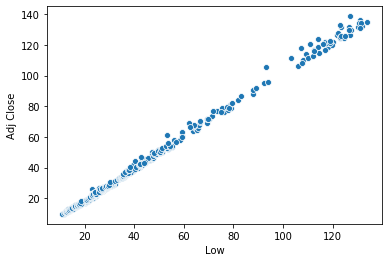

In [15]:
sns.scatterplot(x='Low',y='Adj Close',data=df)

In [16]:
#  the Adj close price has  linear relationship with Low

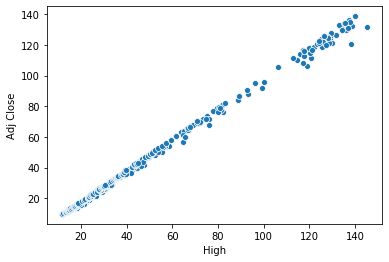

In [17]:
sns.scatterplot(x='High',y='Adj Close',data=df)

In [18]:
#  high also has nice linear relationship with Adj close

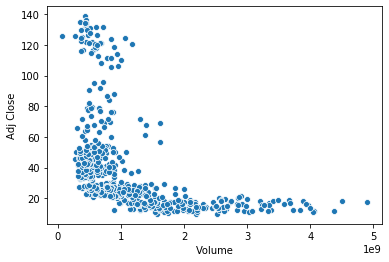

In [19]:
sns.scatterplot(x="Volume",y="Adj Close",data=df)
#no nice relation with Volume

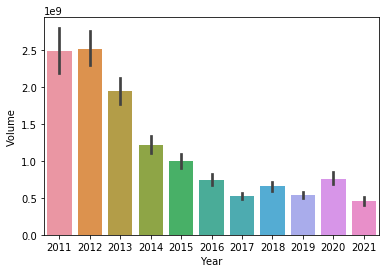

In [20]:
sns.barplot(x='Year',y='Volume',data=df)
# this is different from amazon 
#its volume is decresing with Time

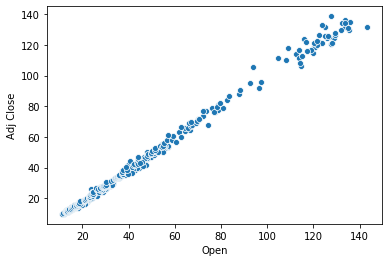

In [21]:
sns.scatterplot(x="Open",y='Adj Close',data=df)

In [22]:
#linear relationship with open price also

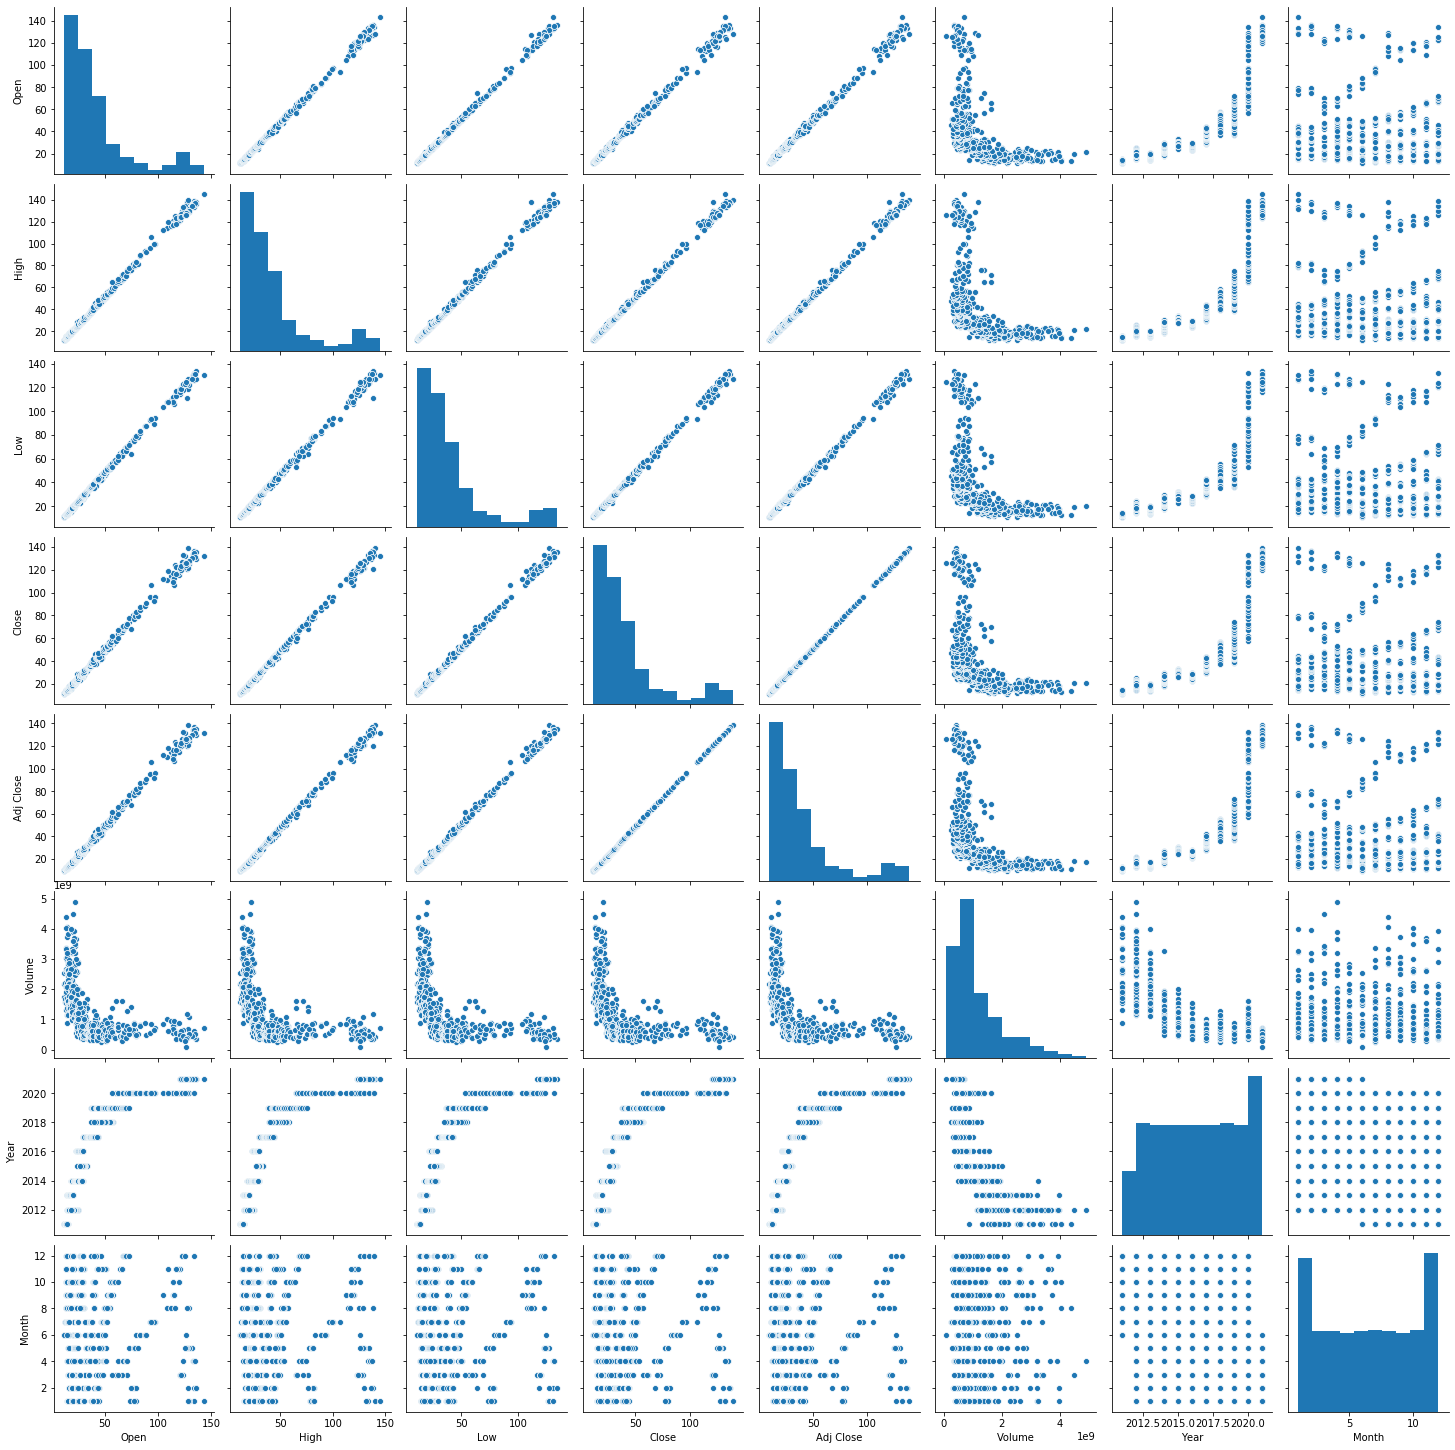

In [23]:
sns.pairplot(df)

In [24]:
#close or adj close are same so w have to drop close
# dropping Date also as we have extracted year and month from it

In [25]:
df.drop('Close',axis=1,inplace=True)

In [26]:
df

,Date,Open,High,Low,Adj Close,Volume,Year,Month
0,2011-06-06,12.077500,12.079286,11.625357,10.008657,1572552800,2011,6
1,2011-06-13,11.685714,11.901786,11.368929,9.835445,2188849600,2011,6
2,2011-06-20,11.334286,11.898214,11.089286,10.022475,2524177600,2011,6
3,2011-06-27,11.699643,12.267857,11.687500,10.541796,1744926400,2011,6
4,2011-07-04,12.250000,12.857143,12.232143,11.046986,1688976800,2011,7
...,...,...,...,...,...,...,...,...
518,2021-05-10,129.410004,129.539993,122.250000,127.449997,514054100,2021,5
519,2021-05-17,126.820000,128.000000,122.860001,125.430000,386352000,2021,5
520,2021-05-24,126.010002,128.320007,124.550003,124.610001,357615000,2021,5
521,2021-05-31,125.080002,126.160004,123.129997,125.889999,278232500,2021,5


In [27]:
df.drop('Date',axis=1,inplace=True)

In [28]:
df

,Open,High,Low,Adj Close,Volume,Year,Month
0,12.077500,12.079286,11.625357,10.008657,1572552800,2011,6
1,11.685714,11.901786,11.368929,9.835445,2188849600,2011,6
2,11.334286,11.898214,11.089286,10.022475,2524177600,2011,6
3,11.699643,12.267857,11.687500,10.541796,1744926400,2011,6
4,12.250000,12.857143,12.232143,11.046986,1688976800,2011,7
...,...,...,...,...,...,...,...
518,129.410004,129.539993,122.250000,127.449997,514054100,2021,5
519,126.820000,128.000000,122.860001,125.430000,386352000,2021,5
520,126.010002,128.320007,124.550003,124.610001,357615000,2021,5
521,125.080002,126.160004,123.129997,125.889999,278232500,2021,5


In [29]:
#as no data is missing so we donot have to deal with missing Data

In [30]:
#TEST TRAIN SPLIT

In [31]:
X=df[['Open',"High",'Low','Volume','Year','Month']]
y=df['Adj Close']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model1=LinearRegression()

In [36]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# EVALUATING our model

In [38]:
model1.intercept_

-426.9243542503533

In [39]:
model1.coef_

array([-6.45031390e-01,  8.58085215e-01,  7.87130878e-01,  6.01651969e-11,
        2.10822274e-01,  4.81005229e-03])

In [40]:
#PREDICTIONS of our model

In [41]:
predictions = model1.predict(X_test)

In [42]:
predictions

array([ 13.27851115,  21.02138585,  42.35701691,  54.27352056,
        16.26903297,  52.68587842,  21.09637737,  15.96336958,
        40.36834686,  38.19639652,  23.40103126,  31.04051837,
        13.98110789,  65.89965145,  54.45832326,  14.05549944,
        22.11703792,  44.96846896,  13.38577935,  17.68025202,
        19.12367797,  31.40715869,  34.50878138,  26.06737707,
        23.14164003,  10.44755333,  22.65238293, 132.72047814,
         9.98247758,  25.28054055,  37.9352957 , 128.80184115,
        17.90022626,  26.6667332 ,  16.46081539,  16.19935805,
        34.1477862 ,  81.344653  ,  37.219665  ,  52.3624467 ,
        26.85575817, 112.34429287,  29.37428599,  12.57422447,
        13.4851942 ,  25.37607178,  50.99878476, 115.81179848,
       112.97778193,  34.18763512,  12.55175737,  23.31706768,
        10.941989  ,  10.32002718,  21.91461937, 123.39211887,
        22.94160466,  11.27043666,  12.22945811,  40.62242296,
        30.35675552,  23.40433605,  45.17129136, 134.97

In [43]:
predictions.shape

(131,)

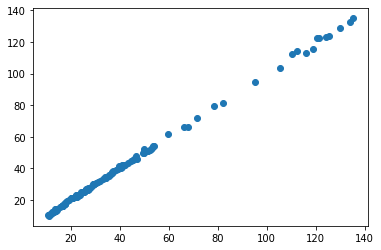

In [44]:
plt.scatter(y_test,predictions)

In [45]:
#Evaluation METRICS

In [46]:
from sklearn import metrics

In [47]:
 metrics.mean_absolute_error(y_test, predictions)

0.5917613122085117

In [48]:
metrics.mean_squared_error(y_test, predictions)

0.6729464859368524

In [49]:
(metrics.mean_squared_error(y_test, predictions))**0.5
#RMSE

0.820333155453839

In [50]:

print(df['Adj Close'].max())
print(df['Adj Close'].min())
print(df['Adj Close'].mean())

138.627029
9.835445
39.55913393116633


In [51]:
# Now we implement lasso regression 


In [52]:
from sklearn.linear_model import Lasso

In [53]:
model2=Lasso(max_iter=10000)

In [54]:
model2.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
predictions=model2.predict(X_test)

In [56]:
predictions

array([ 13.06350992,  21.21779205,  41.399114  ,  53.55600286,
        16.04696866,  53.16845721,  21.30454866,  16.18233789,
        40.85176522,  38.03858635,  23.58808635,  30.90277198,
        14.04678156,  64.34581438,  54.95246647,  13.92016067,
        22.33294858,  45.06786167,  13.19340891,  17.56421367,
        19.3419322 ,  31.06495508,  34.48909013,  26.15374338,
        22.79485388,  11.02619351,  22.45054899, 132.77480828,
        10.28929798,  25.241691  ,  37.94510412, 130.28363243,
        17.77379903,  26.60960875,  16.30869114,  16.22626048,
        33.83248087,  80.13626399,  36.63141566,  51.86649062,
        26.75407641, 110.61197034,  30.00715021,  13.10865649,
        13.34095282,  25.27402023,  50.24633229, 117.94564332,
       114.55715152,  34.34761822,  12.62949047,  23.51435315,
        11.20724101,  10.54355855,  22.03586476, 125.27251591,
        23.0570042 ,  10.79240422,  11.65257118,  41.27734427,
        30.26198825,  23.26519275,  44.04288384, 135.17

In [57]:
predictions.shape

(131,)

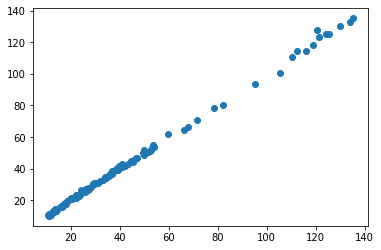

In [58]:
plt.scatter(x=y_test,y=predictions)

In [59]:
# evaluating the model

In [60]:
model2.intercept_

-1.7672564324571098

In [61]:
model2.coef_

array([ 0.00000000e+00,  6.81381137e-01,  3.22586659e-01, -3.82643726e-10,
        0.00000000e+00, -0.00000000e+00])

In [62]:
# comparing this with linear regression 
# it help in reducing unwanted dimension from data by assigning it to 0
#In this example it is visible that coeff of open year and month became zero

In [63]:
from sklearn import metrics

In [64]:
metrics.mean_absolute_error(y_test, predictions)

0.7318012468931625

In [65]:
metrics.mean_squared_error(y_test, predictions)

1.3249264866600097

In [66]:
Rmse=metrics.mean_squared_error(y_test, predictions)**0.5
Rmse

1.1510545107248438

In [67]:
# now use ridge regression 
# it is quite similar to Lasso but the extra term is  λ*|slope|^2

In [68]:
from sklearn.linear_model import Ridge

In [69]:
model3=Ridge()
# i normalise the value as it is giving warning due to some big values
# but after normalisation the result became worse than the average case 


In [70]:
model3.fit(X_train,y_train)

C:\Users\manish\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.41744e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
predictions=model3.predict(X_test)

In [72]:
predictions

array([ 13.27778595,  21.02237905,  42.35372864,  54.27075903,
        16.2680267 ,  52.68920266,  21.09657638,  15.96600806,
        40.37138074,  38.19586323,  23.40209393,  31.03904895,
        13.98018528,  65.89216461,  54.46168999,  14.05512635,
        22.11659334,  44.97014345,  13.3841131 ,  17.67868062,
        19.12384758,  31.405884  ,  34.50975759,  26.06756186,
        23.1399247 ,  10.4481262 ,  22.6512111 , 132.72199525,
         9.98268055,  25.28040919,  37.93572306, 128.80935276,
        17.8996971 ,  26.66648475,  16.45985892,  16.20066484,
        34.14632171,  81.33956364,  37.21689142,  52.36054416,
        26.85536166, 112.33541115,  29.37699931,  12.57462685,
        13.48433549,  25.37510193,  50.99647106, 115.82213943,
       112.98637409,  34.18889637,  12.55095373,  23.31857321,
        10.94122937,  10.32109141,  21.91564012, 123.40302375,
        22.94112763,  11.26831013,  12.22755411,  40.62633735,
        30.35530203,  23.40327174,  45.1666128 , 134.98

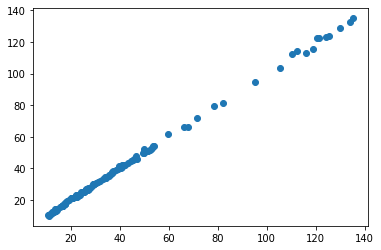

In [73]:
plt.scatter(x=y_test,y=predictions)

In [74]:
model3.intercept_

-426.55593542327995

In [75]:
model3.coef_
#ridge regression is helpful when we have shortage of data 

array([-6.41569383e-01,  8.56561413e-01,  7.85201845e-01,  5.96514660e-11,
        2.10639640e-01,  4.81214541e-03])

In [76]:
from sklearn import metrics

In [77]:
metrics.mean_absolute_error(y_test, predictions)

0.5919386147307308

In [78]:
metrics.mean_squared_error(y_test, predictions)

0.67297095238644

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model4=RandomForestRegressor()


In [81]:
model4.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
y_test

92     13.826271
69     20.127623
400    41.479961
431    53.884773
139    16.506014
         ...    
20     12.436344
115    15.820975
347    38.489887
208    29.442848
160    21.148598
Name: Adj Close, Length: 131, dtype: float64

In [83]:
predictions=model4.predict(X_test)

In [84]:
predictions

array([ 13.62769626,  21.02253742,  41.1163165 ,  54.55638374,
        16.00165668,  53.13343028,  21.23260049,  15.92418348,
        40.76912936,  37.90838052,  23.06360826,  29.35241043,
        14.10054071,  64.97338396,  55.27313511,  14.16550672,
        22.16074771,  45.28275014,  13.62929539,  17.45683727,
        18.69105749,  29.90000653,  34.63519865,  25.86681108,
        22.20678892,  11.72805777,  22.37983797, 134.13063441,
        11.40463595,  24.99762301,  38.1010224 , 132.28141052,
        17.6115824 ,  26.00313708,  16.23382809,  16.56642851,
        33.45401887,  80.67370412,  36.75028688,  50.75333676,
        26.44228008, 111.93471231,  28.99454582,  13.27362099,
        13.70027709,  24.87559626,  50.04826251, 117.25603385,
       114.87727239,  34.20469552,  12.83893912,  23.44677694,
        11.76197471,  11.6484849 ,  21.73683061, 126.55147075,
        22.90440767,  11.66238427,  12.48031239,  40.87892641,
        29.48951246,  23.19997506,  43.46137127, 133.96

In [85]:
metrics.mean_absolute_error(y_test, predictions)

0.7931672716653949

In [86]:
metrics.mean_squared_error(y_test, predictions)

1.637203897933433

In [87]:
df
# now lets look assume adj_close =low+high /2 


,Open,High,Low,Adj Close,Volume,Year,Month
0,12.077500,12.079286,11.625357,10.008657,1572552800,2011,6
1,11.685714,11.901786,11.368929,9.835445,2188849600,2011,6
2,11.334286,11.898214,11.089286,10.022475,2524177600,2011,6
3,11.699643,12.267857,11.687500,10.541796,1744926400,2011,6
4,12.250000,12.857143,12.232143,11.046986,1688976800,2011,7
...,...,...,...,...,...,...,...
518,129.410004,129.539993,122.250000,127.449997,514054100,2021,5
519,126.820000,128.000000,122.860001,125.430000,386352000,2021,5
520,126.010002,128.320007,124.550003,124.610001,357615000,2021,5
521,125.080002,126.160004,123.129997,125.889999,278232500,2021,5


In [88]:
df['Avg']=(df['Low']+df['High'])/2

In [89]:
df

,Open,High,Low,Adj Close,Volume,Year,Month,Avg
0,12.077500,12.079286,11.625357,10.008657,1572552800,2011,6,11.852322
1,11.685714,11.901786,11.368929,9.835445,2188849600,2011,6,11.635357
2,11.334286,11.898214,11.089286,10.022475,2524177600,2011,6,11.493750
3,11.699643,12.267857,11.687500,10.541796,1744926400,2011,6,11.977678
4,12.250000,12.857143,12.232143,11.046986,1688976800,2011,7,12.544643
...,...,...,...,...,...,...,...,...
518,129.410004,129.539993,122.250000,127.449997,514054100,2021,5,125.894996
519,126.820000,128.000000,122.860001,125.430000,386352000,2021,5,125.430001
520,126.010002,128.320007,124.550003,124.610001,357615000,2021,5,126.435005
521,125.080002,126.160004,123.129997,125.889999,278232500,2021,5,124.645001


In [90]:
metrics.mean_absolute_error(df['Adj Close'],df['Avg'])

1.9407506166347992

In [91]:
metrics.mean_squared_error(df['Adj Close'],df['Avg'])

4.585456224168292

In [92]:
# 5th model is Decision trees

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
model5=DecisionTreeRegressor()

In [95]:
model5.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [96]:
predictions=model5.predict(X_test)

In [97]:
predictions

array([ 13.83403 ,  21.308287,  40.804073,  55.919472,  16.043634,
        52.433147,  21.140608,  15.900002,  40.279934,  37.635151,
        23.168289,  28.85317 ,  14.108208,  68.841034,  54.296047,
        14.049098,  22.394749,  45.583298,  13.591538,  17.268381,
        18.908646,  32.393925,  34.817364,  25.938267,  21.813219,
        11.968005,  22.579247, 133.93251 ,  11.577671,  25.110729,
        38.961342, 131.629379,  17.822104,  25.55687 ,  16.421261,
        16.81443 ,  33.434532,  80.475937,  36.431133,  49.715195,
        26.658741, 114.344223,  28.493084,  12.892705,  13.83403 ,
        24.531809,  50.16386 , 114.476074, 116.96624 ,  34.279442,
        12.291699,  23.912012,  11.968005,  11.514712,  21.818171,
       126.735023,  22.901569,  11.780051,  12.065359,  40.804073,
        29.664848,  23.415861,  43.918888, 132.267349,  41.967163,
        21.308287,  26.131012,  91.995125,  28.782272,  34.279442,
        42.073257,  29.104137,  50.16386 ,  42.429626,  26.658

In [98]:
metrics.mean_absolute_error(y_test, predictions)

1.0647230610687022

In [99]:
metrics.mean_squared_error(y_test, predictions)

3.297340543707688

In [100]:
# Comparing ALL models

In [101]:
# 1 comparing mean absolute error
model_name=['Linear Regression','Lasso Regression','Ridge Regression','Random forest regressor','Decision tree regressor','Avg of low high']

<BarContainer object of 6 artists>

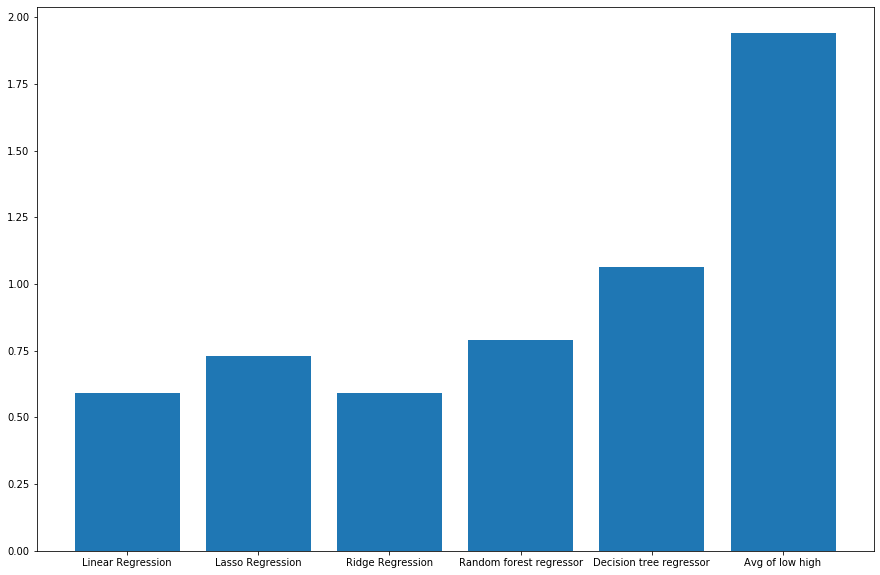

In [106]:
MAE=[0.59,0.73,0.59,0.79,1.064,1.94]
plt.figure(figsize=(15,10))
plt.bar(model_name,MAE)

<BarContainer object of 6 artists>

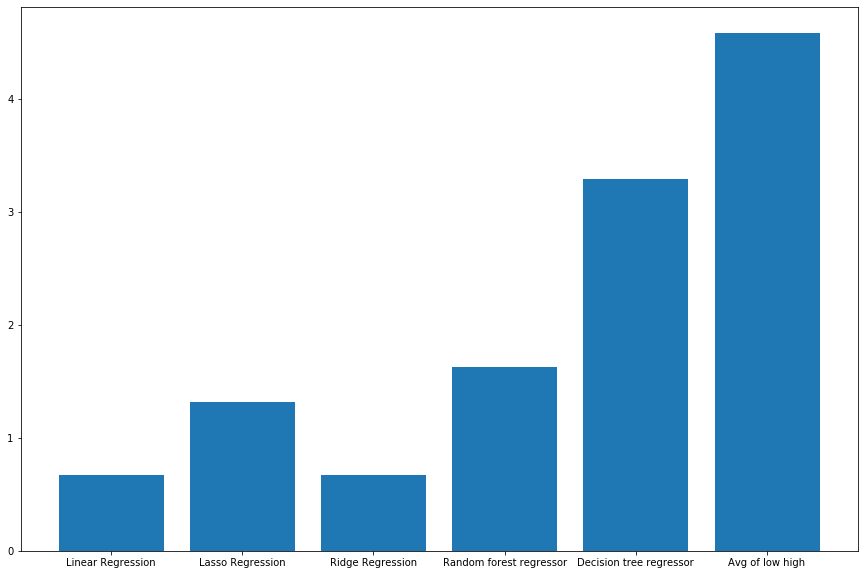

In [107]:
MSE=[0.672,1.32,0.672,1.63,3.29,4.58]
plt.figure(figsize=(15,10))
plt.bar(model_name,MSE)

<BarContainer object of 6 artists>

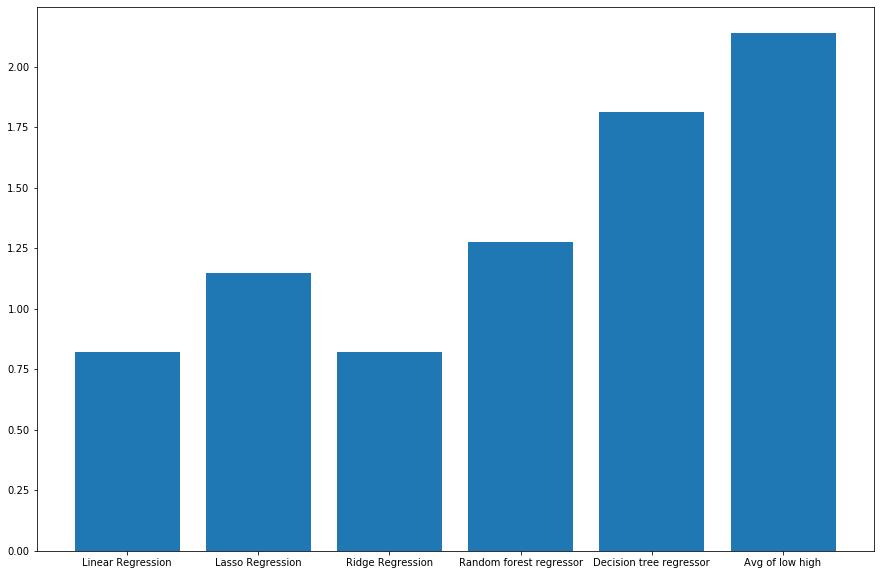

In [108]:

RMSE=list(map(np.sqrt,MSE))
RMSE
plt.figure(figsize=(15,10))
plt.bar(model_name,RMSE)

In [109]:
# by analysing All the graphs we can say that linear regression and ridge regression performs quite similar
#Lasso and random forest regressor performed average
#this time alll models beat average of high +low/2